# RP - Scintillation Detectors

Research Practicum: Scintillation Detectors
Student names: Bouchra Bouras (5364213) and Zeno Hamers (5254981)
Supervisors: Folkert Geurink, Dr.ir. Robin de Kruijff, Dr.ir. Antonia Denkova

Measurement days: 

Day 1: 11/02/2022 (Well-Type: Sc-46, Cr-51, Co-57, Cs-137, Am-241; Coax-Type: Sc-46, Cr-51, Co-57, Cs-137, Tm-170)

Day 2: 14/02/2022 (Well-Type: Tm-170, Na-22; Coax-Type: Am-241, Na-22)

Research Objective:
Analyzing the differences between NaI(TI) Well type and LaBr3(Ce) Coax type detector. Specifically energy calibration, absolute and relative energy resolution, and full energy peak resolution. 

In [1]:
# Initialisation code for the notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# Measurement Data:

In [2]:
#Data set (see corresponding spread sheet) #calculations to find R and FWHM can be found in the corresponding spread sheet
#
#! NaI(TI) Well type detector data:
#

#Energy calibration data (all channel/energy data available)
cal_channels_w = np.array([303,381,687,111,42,227,29,19,177,354,431,612,790])
cal_energies_w = np.array([889.28,1120.552,2009.832,320.0835,129.267265,661.659,84.25477,59.54092,511,1022,1274.577,1785.577,2296.577])
counts_w = np.array([23532, 14979, 1691, 46325, 3525552, 82866, 1267485, 680426, 172608, 30471, 22800, 9780, 1569])

#Energy resolution data (only peaks with a Clean Gaussian form) #IMPORTANT! order of nucleotides: Sc-46, Cr-51, Co-57, Cs-137, Tm-170, Am-241, Na-22
name_w = np.array(['Sc-46 peak 1','Sc-46 peak 2', 'Cr-51', 'Co-57', 'Cs-137', 'Tm-170', 'Am-241', 'Na-22 peak 1 Annihilation 1 photon ', 'Na-22 peak 2 Annihilation 2 photons', 'Na-22 peak 3', 'Na-22 TCS peak 1 and 3'])
energies_w = np.array([889.28,1120.552,320.0835,129.267265,661.659,84.25477,59.54092,511,1022,1274.577,1785.577])

#Energy efficiency data (only peaks with a Clean Gaussian form)
energies_eff_w = np.array([889.28,1120.552,320.0835,129.267265,661.659,84.25477,59.54092,1274.577])
Pgamma_w = np.array([ 99.98374, 99.97,9.89, 85.49+10.71 , 84.99, 2.48, 35.92, 99.94]) *0.01 #(in procent) Co-57 samengenomen pieken
R_w    = np.array([ 341.2988889,462.54, 581.9755556, 24377.50889, 1531.041111, 2331.005556, 3328.48, 442.8255556]) #Na-22 annihilatie weg


#
#! LaBr3(Ce) Coax type detector data:
#

#Energy calibration data (all channel/energy data available) 
cal_channels_c = np.array([293, 367, 652, 111, 49, 216, 37, 29, 166, 399, 557])
cal_energies_c = np.array([889.28, 1120.552, 2009.832, 320.0835, 129.267265, 661.659, 84.25477, 59.54092, 511, 1274.577, 1785.577])
counts_c = np.array([24509, 16688, 565, 36570, 289316, 2708038, 52532, 710853, 706296, 27517, 281455, 4119])

#Energy resolution data (only peaks with a clean Gaussian form)
#IMPORTANT: order of nucleotides: Sc-46, Cr-51, Co-57, Cs-137, Tm-170, Am-241, Na-22
name_c = np.array(['Sc-46 peak 1','Sc-46 peak 2', 'Cr-51', 'Co-57', 'Cs-137', 'Tm-170', 'Am-241', 'Na-22 peak 1: Annihilation 1 photon ', 'Na-22 peak 2', 'Na-22 TCS peak 1 and 2'])
energies_c = np.array([889.28, 1120.552, 320.0835, 129.267265, 661.659, 84.25477, 59.54092, 511, 1274.577, 1785.577])


#Energy efficiency data (only peaks with a clean Gaussian form)
energies_eff_c = np.array([889.28, 1120.552, 320.0835, 129.267265, 661.659, 84.25477, 59.54092, 1274.577])
Pgamma_c = np.array([ 99.98374,99.97, 9.89, 85.49+10.71 , 84.99, 2.48, 35.92, 99.94]) * 0.01 #Co-57 samengenomen pieken
R_c = np.array([238.2233333, 169.3811111, 199.1733333, 10255.80667, 434.6877778, 1402.612222, 2257.493333, 313.5888889]) #Na-22 annihilatie weg


#Background Radiation
counts_back_c = np.array([])

#error check:
def data_errorcheck(ar1,ar2):
  if len(ar1) == len(ar2):
    return True
  else:
    print("The arrays do not have the same length!")

data_errorcheck(name_w,energies_w)
data_errorcheck(name_c,energies_c)


True

In [3]:
#importing background radiation data
background_w = np.loadtxt('/content/NaI(Tl)_BG.txt') 
background_c = np.loadtxt('/content/LaBr3(Ce)_BG.txt')
background_w[0:2] = [0,0]
background_c[0:2] = [0,0]

# Energy Calibration:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


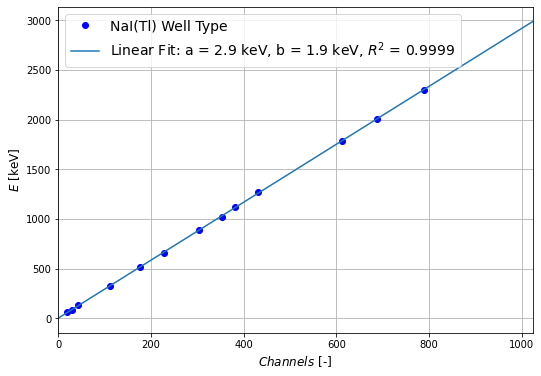

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


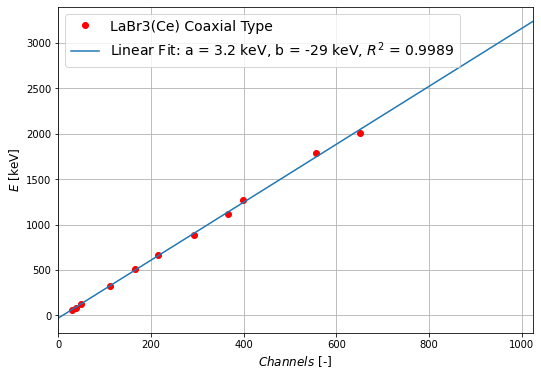

a,b voor well type = (2.915921421714314, 1.939967416979429)
a,b voor coaxial type = (3.1852987624416818, -28.663253251752604)


In [4]:

#curve fitting

def lin(x,a,b):
    return a*x + b

x = np.linspace(0,1024,1000)

var_w, cov_w = curve_fit(lin, cal_channels_w, cal_energies_w)
var_c, cov_c = curve_fit(lin, cal_channels_c, cal_energies_c)

a_w = var_w[0]
b_w = var_w[1] 

a_c = var_c[0]
b_c = var_c[1]

#comptuting R^2 value:

def R2(f,var,x,y):
  residuals = y - f(x,*var)
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res/ss_tot)
  return r_squared

r_squared_w = R2(lin,var_w,cal_channels_w,cal_energies_w)
r_squared_c = R2(lin,var_c,cal_channels_c,cal_energies_c)

#plotting
#plt.subplots(figsize=(12,4))

#plt.subplot(121) #Well type
#plt.figure(figsize=(8,6))
plt.figure(figsize=(8.5,6))
plt.plot(cal_channels_w,cal_energies_w,'bo', label = "NaI(Tl) Well Type")
plt.plot(x,lin(x,a_w,b_w), label = "Linear Fit: a = %.2g keV, b = %.2g keV, $R^{2}$ = %.4g" %(a_w,b_w, r_squared_w))
plt.xlabel("$Channels$ [-]", fontsize = 12)
plt.ylabel("$E$ [keV]", fontsize = 12)
plt.xlim(0,1024)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('energy_calibration_w.eps', format='eps')
plt.show()

#plt.subplot(122) #Coaxial type
plt.figure(figsize=(8.5,6))
plt.plot(cal_channels_c,cal_energies_c,'ro', label = "LaBr3(Ce) Coaxial Type")
plt.plot(x,lin(x,a_c,b_c), label = "Linear Fit: a = %.2g keV, b = %.2g keV, $R^{2}$ = %.4g" %(a_c,b_c, r_squared_c))
plt.xlabel("$Channels$ [-]", fontsize = 12)
plt.ylabel("$E$ [keV]", fontsize = 12)
plt.xlim(0,1024)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('energy_calibration_c.eps', format='eps')
plt.show()

print("a,b voor well type =", (a_w, b_w))
print("a,b voor coaxial type =", (a_c, b_c))



Discussion

The energy calibration of the well type and coaxial type show a linear fit respectively.

# Comparing Energy Resolution

Relative resolution W for Cs-137 = 6.98 percent
FWHM for Cs-137 = 46.2 keV


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


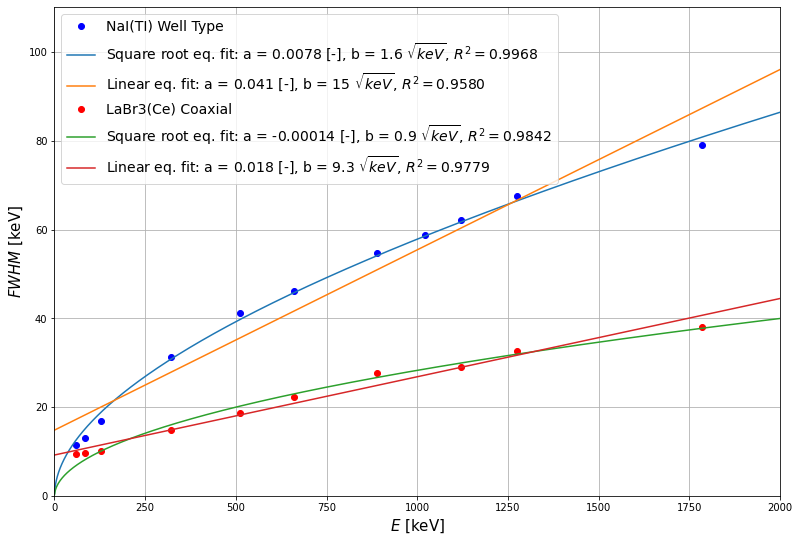

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


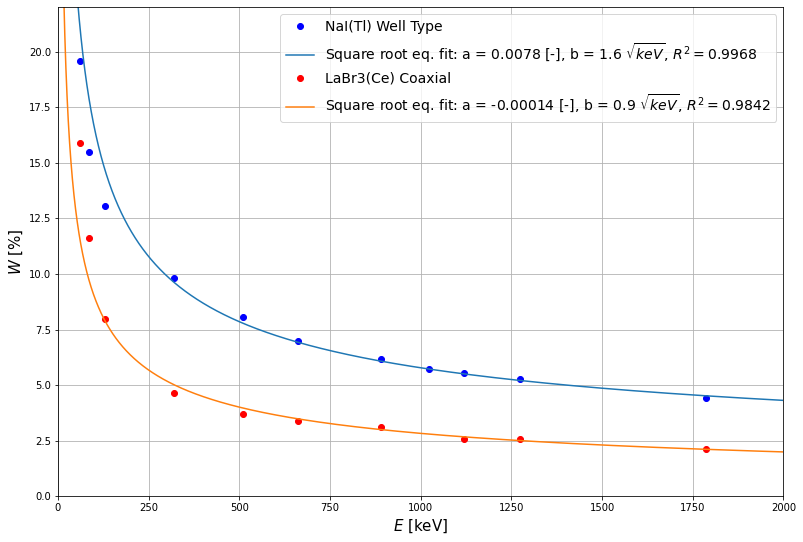

In [5]:
#plotting relative resolution against energy

#argumentation why we take b = 0 for the calculation of the FWHM:
#In correspondence with the supervisor Folkert Geurink, it is decided to take b = 0 for the calculation of the FWHM.
#Since the calibrated offset b_c would create negative FWHM, the unphysical implications of them where clear.

#Well-Type:
#order of peaks: 'Sc-46 peak 1','Sc-46 peak 2', 'Cr-51', 'Co-57', 'Cs-137', 'Tm-170', 'Am-241', 'Na-22 peak 1 Annihilation 1 photon ', 'Na-22 peak 2 Annihilation 2 photons', 'Na-22 peak 3', 'Na-22 TCS peak 1 and 3'
FWHM_w = a_w * np.array([18.77996156, 21.27886882, 10.77752328, 5.788738976, 15.83708589, 4.47527141, 4.000061691, 14.10931965, 20.1195955, 23.15062171, 27.11512905])

#Coax-Type:
#order of peaks: 'Sc-46 peak 1','Sc-46 peak 2', 'Cr-51', 'Co-57', 'Cs-137', 'Tm-170', 'Am-241', 'Na-22 peak 1 Annihilation 1 photon ', 'Na-22 peak 2 Annihilation 2 photons', 'Na-22 peak 3', 'Na-22 TCS peak 1 and 3'
FWHM_c = a_c * np.array([8.707246766, 9.126561225, 4.67983351, 3.234263792 ,7.031472183, 3.078764076, 2.972784917, 5.920139014, 10.24382961, 11.96777751])


#relative resolution:
W_w = FWHM_w * (100/energies_w)
W_c = FWHM_c * (100/energies_c)

index = 4
print("Relative resolution W for %s = %.3g percent" %(name_w[index], W_w[index]))
print("FWHM for %s = %.3g keV" %(name_w[index], FWHM_w[index]))


#fitting empirical (square root) equation
def abs_res_squareroot(E,a,b):                #a and b have units of %
  return (a + b/np.sqrt(E))*E/100

E = np.linspace(0, 2000, 10000)
var_w,cov_w = curve_fit(abs_res_squareroot, energies_w, FWHM_w)
var_c,cov_c = curve_fit(abs_res_squareroot, energies_c, FWHM_c)

r_sq_w = R2(abs_res_squareroot,var_w,energies_w,FWHM_w)
r_sq_c = R2(abs_res_squareroot,var_c,energies_c,FWHM_c)

a_wf = var_w[0]  
b_wf = var_w[1]
a_cf = var_c[0]
b_cf = var_c[1]

#fitting linear equation for the LaBr3(Ce) measurement data

#Well type:
var_wl, cov_wl = curve_fit(lin, energies_w, FWHM_w)
r_sq_wl = R2(lin,var_wl,energies_w,FWHM_w)
a_wl = var_wl[0]
b_wl = var_wl[1]

#Coaxial type:
var_cl, cov_cl = curve_fit(lin, energies_c, FWHM_c)
r_sq_cl = R2(lin,var_cl,energies_c,FWHM_c)
a_cl = var_cl[0]
b_cl = var_cl[1]



#comparing FWHM (absolute resolution):
plt.figure(figsize=(13,9))
plt.plot(energies_w,FWHM_w,'bo', label = "NaI(TI) Well Type")
plt.plot(E,abs_res_squareroot(E,a_wf,b_wf), label = "Square root eq. fit: a = %.2g [-], b = %.2g $\sqrt{keV}$, $R^{2} = %.4g$" %(a_wf/100,b_wf/100, r_sq_w))
plt.plot(E,lin(E,a_wl,b_wl), label = "Linear eq. fit: a = %.2g [-], b = %.2g $\sqrt{keV}$, $R^{2} = %.4f$" %(a_wl,b_wl, r_sq_wl))
plt.plot(energies_c,FWHM_c,'ro', label = "LaBr3(Ce) Coaxial")
plt.plot(E,abs_res_squareroot(E,a_cf,b_cf), label = "Square root eq. fit: a = %.2g [-], b = %.2g $\sqrt{keV}$, $R^{2} = %.4g$" %(a_cf/100,b_cf/100, r_sq_c))
plt.plot(E,lin(E,a_cl,b_cl), label = "Linear eq. fit: a = %.2g [-], b = %.2g $\sqrt{keV}$, $R^{2} = %.4g$" %(a_cl,b_cl, r_sq_cl))

plt.xlabel("$E$ [keV]", fontsize = 15)
plt.ylabel("$FWHM$ [keV]", fontsize = 15)
plt.xlim(0,2000)
plt.ylim(0,110)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('FWHM.eps', format='eps')
plt.show()


#comparing W (relative resolution): 
#Well type
plt.figure(figsize=(13,9))

plt.plot(energies_w,W_w,'bo', label = "NaI(Tl) Well Type")
plt.plot(E,abs_res_squareroot(E,a_wf,b_wf)*100/E, label = "Square root eq. fit: a = %.2g [-], b = %.2g $\sqrt{keV}$, $R^{2} = %.4g$" %(a_wf/100,b_wf/100, r_sq_w))
plt.plot(energies_c,W_c,'ro', label = "LaBr3(Ce) Coaxial")
plt.plot(E,abs_res_squareroot(E,a_cf,b_cf)*100/E, label = "Square root eq. fit: a = %.2g [-], b = %.2g $\sqrt{keV}$, $R^{2} = %.4g$" %(a_cf/100,b_cf/100, r_sq_c))


plt.xlabel("$E$ [keV]", fontsize = 15)
plt.ylabel("$W$ [%]", fontsize = 15)
plt.xlim(0,2000)
plt.ylim(0,22)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('W.eps', format='eps')
plt.show()

Discussion

For the relative energy resolution, a curve fit is needed to determine the relationship between energy and relative resolution. The deminishing decreasing trend points to exponential decay or inversely proportional relation. An inversely proportional relation would be expected because of the determining of the relative energy: 

$W = FWHM * 100/E$.

The absolute energy resolution seems to be showing a linear relation, by a applying a curve fit, this relationship can be checked. 

#Comparing Full Energy Peak Efficiency

Computing activity:

In [6]:
from re import I
#berekening huidige activiteit

#Measurement day 1: 11/02/2022 -> A_d1
#Measurement day 2: 14/02/2022 ->A_d2

#functie voor activiteit
def activity(A0,t_12,t):
    return A0 *(1/2)**(t/t_12)

name_w = np.array(['Sc-46 peak 1','Sc-46 peak 2', 'Cr-51', 'Co-57', 'Cs-137', 'Tm-170', 'Am-241', 'Na-22 peak 3'])

#A0 radionucliden

#! NaI(TI) Well type detector:
# Day 1: Sc-46, Cr-51, Co-57, Cs-137,  Am-24 # Day 2: Tm-170, Na-22
A0_w = np.array([26.2e3, 67e3, 1.94e9, 15e3, 394e3, 47.4e3, 19.1e3]) #Bq. Am-241 en Tm-170 omgedraaid
#volgorde: Sc, Cr, Co, Cs, Tm, Am, Na (correct order with measurement input data)

#! LaBr3(Ce) Coax type detector:
# Day 1: Sc-46, Cr-51, Co-57, Cs-137, Tm-170  # Day 2: Am-241, Na-22
A0_c = np.array([26.2e3, 67e3, 1.94e9, 15e3, 394e3, 47.4e3, 19.1e3]) #Bq
#volgorde: Sc, Cr, Co, Cs, Tm, Am, Na (correct order with measurement input data)

#Times
import datetime as dt

#seconds in a day/year
dag = 24*60*60 #s
jaar = 365*dag #s

#Half-life in seconds
t_12_w = np.array([83.787*dag, 27.704*dag, 271.81*dag, 30.05*jaar, 127.8*dag, 432.6*jaar, 2.6029*jaar]) #s
t_12_c = t_12_w
#volgorde: Sc, Cr, Co, Cs, Tm, Am, Na (correct order with measurement input data)

#t_0 date of establishing A0 (chosen at 12 in the afternoon)
#t_d1 and t_d2 seconds between date of establishing A0 (t_0) and date of measurements (d1/d2))
d1 = dt.datetime(2022,2,11,14,30,00) 
d2 = dt.datetime(2022,2,14,9,00,00)

#times of activity determining
t_0_c = np.array([dt.datetime(2021,8,20,12,00,00),    #Sc-46
                  dt.datetime(2021,12,16,12,00,00),   #Cr-51
                  dt.datetime(2010,4,13,12,00,00),    #Co-57
                  dt.datetime(2014,11,17,12,00,00),   #Cs-137
                  dt.datetime(2022,2,1,12,00,00),     #Tm-170
                  dt.datetime(2020,2,4,12,00,00),     #Am-241
                  dt.datetime(2022,1,17,12,00,00)])   #Na-22
t_0_w = t_0_c 

#make empty array for seconds between determined activity and measurement on day 1 and day 2
t_d1_w = np.zeros(len(t_0_w))
t_d2_w = np.zeros(len(t_0_w))

#fill arrays for both days
for i in range(len(t_0_w)):
  t_d1_w[i] = (d1-t_0_w[i]).total_seconds()
  t_d2_w[i] = (d2-t_0_w[i]).total_seconds()

#remove radionuclides from days they were not measured. 
# Day 1: Sc-46, Cr-51, Co-57, Cs-137,  Am-241
# Day 2: Tm-170, Na-22
t_w = t_d1_w
t_w[4] = t_d2_w[4]
t_w[6] = t_d2_w[6]
#volgorde: Sc, Cr, Co, Cs, Tm, Am, Na (correct order with measurement input data)

#make empty array for seconds
t_d1_c = np.zeros(len(t_0_c))
t_d2_c = np.zeros(len(t_0_c))

#fill arrays for both days
for i in range(len(t_0_c)):
  t_d1_c[i] = (d1-t_0_c[i]).total_seconds()
  t_d2_c[i] = (d2-t_0_c[i]).total_seconds()

#remove radionuclides from days they were not measured
t_d1_c = t_d1_c[:-2]
t_d2_c = t_d2_c[5:]
t_c = np.append(t_d1_c, t_d2_c)

#Activiteit 
A_w = activity(A0_w, t_12_w, t_w)
A_c = activity(A0_c, t_12_c, t_c)

#Scandium has two peaks in its spectrum -> Activity needs to be first two elements in array
A_w = np.append(A_w[0], A_w)
A_c = np.append(A_c[0], A_c)

print("activity well type radionuclides in Bq", A_w, )
print("activity coaxial radionuclides in Bq", A_c)

activity well type radionuclides in Bq [  6154.4168945    6154.4168945   16054.04095344  31700.39518587
  12692.57473094 367425.63373431  47246.66592321  18715.48376095]
activity coaxial radionuclides in Bq [  6154.4168945    6154.4168945   16054.04095344  31700.39518587
  12692.57473094 372989.05398496  47246.09124462  18715.48376095]


Plotting Full Energy Peak Efficiency:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


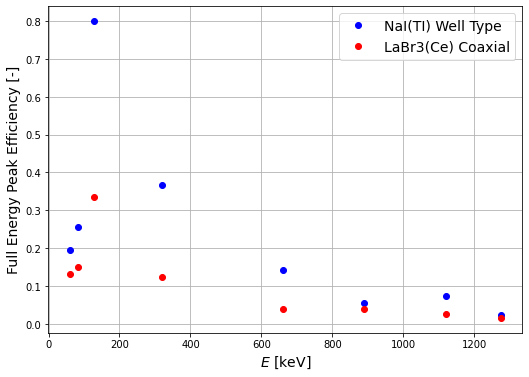

In [7]:
#e stands for "epsilon" and symbolizes the full-energy peak efficiency
#activity A
#P is the probability of emission of the particular photon being measured
e_w = R_w/(A_w * Pgamma_w)
e_c = R_c/(A_c * Pgamma_c)


plt.figure(figsize=(8.5,6))

plt.plot(energies_eff_w, e_w, "bo", label="NaI(TI) Well Type")
plt.plot(energies_eff_c, e_c, "ro", label="LaBr3(Ce) Coaxial")
plt.ylabel("Full Energy Peak Efficiency [-]", fontsize = 14)
plt.xlabel("$E$ [keV]", fontsize = 14)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('FEPE.eps', format='eps')
plt.show()

Discussion

The difference between the two detectors becomes apparent in these graphs. For both detectors, the maximum efficiency is reached for co-57, with a combined energy of both peaks of 129,267265 keV. While the energy is the same, the maximum peak efficiency is different for both scintillation detectors. It comes down to 0.8 for the well type and 0.34 for the coaxial type respectively.

# Background Radiation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


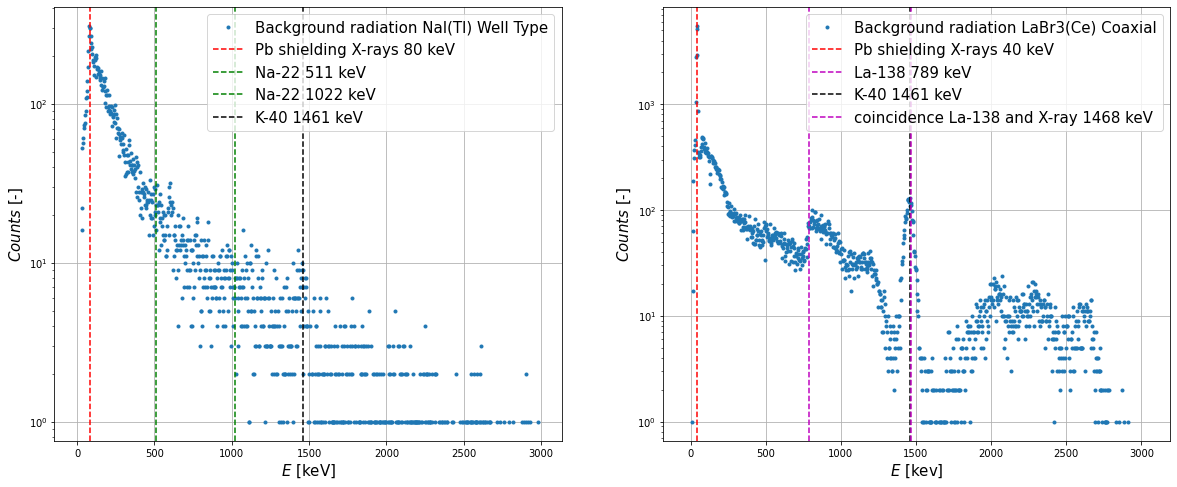

In [8]:
#compute the corresponding energies with the measured channels

backchannels = np.linspace(0,1023,1024)

E_back_w = a_w * backchannels + b_w

                         
#Argumentation why a_c = 3:
#The background radiation was measured on two occasions, 
#the first of which only a print-screen was made and
#this was not conclusive on the origin of the background radiation. 
#For this reason another background radiation measurement was performed approximately 16 days after completion of the initial measurements. 
#Because of the change in environmentally factors between the two background radiation measurements and the visible peak shift for 1461-1468 keV,
#the choice was made to adjust the energy calibration constant $a$ to 3 keV.\\

a_c = 3   
E_back_c = a_c * backchannels + b_c

#plotting the background radiation counts vs energies
plt.subplots(figsize=(20,8))

plt.subplot(121) #Well type
plt.plot(E_back_w, background_w,'.', label = "Background radiation NaI(Tl) Well Type")
plt.xlabel("$E$ [keV]", fontsize = 15)
plt.ylabel("$Counts$ [-]", fontsize = 15)
plt.yscale("log")
plt.axvline(x = 80, c = "r", linestyle = '--', label = "Pb shielding X-rays 80 keV")
plt.axvline(x = 511, c = "g", linestyle = '--', label = "Na-22 511 keV")
plt.axvline(x = 1022, c = "g", linestyle = '--', label = "Na-22 1022 keV")
#plt.axvline(x = 662, c = "r", linestyle = '--', label = "Ce-137 662 keV")
plt.axvline(x = 1461, c = "k", linestyle = '--', label = "K-40 1461 keV")
#plt.xlim(0,1024)
plt.grid()
plt.legend(fontsize = 15)


plt.subplot(122) #Coaxial type
plt.plot(E_back_c, background_c,'.', label = "Background radiation LaBr3(Ce) Coaxial")
plt.xlabel("$E$ [kev]", fontsize = 15)
plt.ylabel("$Counts$ [-]", fontsize = 15)
plt.axvline(x = 40, c = "r", linestyle = '--', label = "Pb shielding X-rays 40 keV")
plt.axvline(x = 789, c = "m", linestyle = '--', label = "La-138 789 keV")
plt.axvline(x = 1461, c = "k", linestyle = '--', label = "K-40 1461 keV")
plt.axvline(x = 1468, c = "m", linestyle = '--', label = "coincidence La-138 and X-ray 1468 keV")

plt.yscale("log")
#plt.xlim(0,1024)
plt.grid()
plt.legend(fontsize = 15)
plt.savefig('background_radiation.eps', format='eps')
plt.show()


Materials: 

NaI(Tl):
  - Na-22 peak at: 511 kev

  - K-40  (0.0117% of natural K)
  decay: electron capture (1461 keV) to Ar-40

  (in general, NaI(Tl) detectors have very little internal contamination compared to LaBr3(Ce))

LaBr3(Ce): 
  - x- ray peak at 30-40 keV
  - Ac-227 (with daughter La-138)
  -> Ac-227 dominates spectrum 1.6-3 MeV (purification is more succesful for this radioisotope)
  -> La-138 dominates below 1.6 MeV
  - La-138 (789-keV)
  -> 789 kev gamma ray in coincidence with a beta particle?
  -> also 1435 keV peak that becomes a 1468 keV peak under x-ray interactions. (http://www.nucleide.org/Laraweb/Result_Lara2.php)
  - K-40 (1461 keV)


#Investigating detector geometry differences

Discussion

The geometric differences have the greatest effect when annihilation takes place. As the well type encapsulates the radionuclide source. And for the coaxial type, the source lays on top. Annihilation happens when an electron and positron react with eachother and emit two photons in opposing directions. In the welltype there is a chance that both of these photons will be detected, while the coaxial type can detect one at the most. 